<a href="https://colab.research.google.com/github/Henil21/Intro_to_computer_vision_and_CNN/blob/main/Multiclass_classification_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2022-11-12 06:19:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2022-11-12 06:19:47 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

for folderpath, subfolder, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(subfolder)}subfolder with {len(filenames)} images in {folderpath} ")
  

there are 2subfolder with 0 images in 10_food_classes_all_data 
there are 10subfolder with 0 images in 10_food_classes_all_data/train 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/hamburger 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/steak 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/chicken_wings 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/chicken_curry 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/ice_cream 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/sushi 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/fried_rice 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/ramen 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/pizza 
there are 0subfolder with 750 images in 10_food_classes_all_data/train/grilled_salmon 
there are 10subfolder with 0 images in 10_food_

In [5]:
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/10_food_classes_all_data/train")
class_name=np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_name from the subdirectories
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_images(target_dir,target_class):
  target=target_dir+target_class
  img=random.sample(os.listdir(target),1)
  print(img)
  image=mpimg.imread(target+'/'+img[0])
  plt.imshow(image)
  print(f"img shape:{image.shape}")
  plt.axis("off")
  print(target)
  return img

['120612.jpg']
img shape:(382, 512, 3)
10_food_classes_all_data/train/hamburger


['120612.jpg']

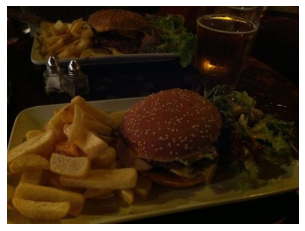

In [7]:
import random
view_random_images(target_dir='10_food_classes_all_data/train/',
                   target_class=random.choice(class_name))

In [8]:
train='10_food_classes_all_data/train'
test='10_food_classes_all_data/test'


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/225)
test_datagen= ImageDataGenerator(rescale=1/225)
train_data=train_datagen.flow_from_directory(train,
                                             target_size=(224,224),
                                             batch_size=(32),
                                             class_mode='categorical')
test_data=train_datagen.flow_from_directory(test,
                                             target_size=(224,224),
                                             batch_size=(32),
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Conv2D , Flatten ,Dense
from tensorflow.keras.optimizers import Adam

model=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=(test_data),
          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 192ms/step - loss: 2.1103 - accuracy: 0.2256 - val_loss: 1.9640 - val_accuracy: 0.2944
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8901 - accuracy: 0.3383 - val_loss: 1.9153 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.7141 - accuracy: 0.4155 - val_loss: 1.8995 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 1.5174 - accuracy: 0.4888 - val_loss: 1.8608 - val_accuracy: 0.3544
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 1.2782 - accuracy: 0.5655 - val_loss: 2.0606 - val_accuracy: 0.3588
